In [15]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7311 - loss: 1.0459 - val_accuracy: 0.9020 - val_loss: 0.3586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9006 - loss: 0.3592 - val_accuracy: 0.9162 - val_loss: 0.2969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9163 - loss: 0.2998 - val_accuracy: 0.9265 - val_loss: 0.2627
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9260 - loss: 0.2604 - val_accuracy: 0.9317 - val_loss: 0.2423
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9302 - loss: 0.2465 - val_accuracy: 0.9369 - val_loss: 0.2232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9365 - loss: 0.2291 - val_accuracy: 0.9410 - val_loss: 0.2082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9402 - loss: 0.2082 - val_accuracy: 0.9426 - val_loss: 0.1962
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9453 - loss: 0.1950 - 

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1948
Loss = 0.167
Accuracy = 0.952


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value =  5


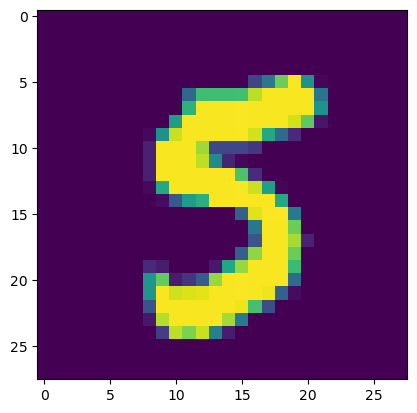

In [23]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show
predicted_val = model.predict(x_test)
print("Predicted Value = ", np.argmax(predicted_val[n]))

<function matplotlib.pyplot.show(close=None, block=None)>

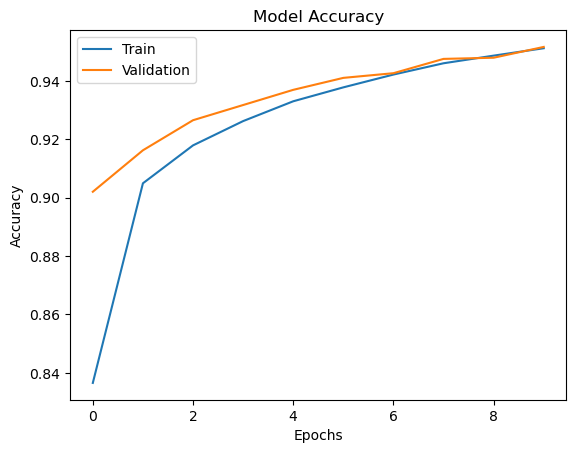

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

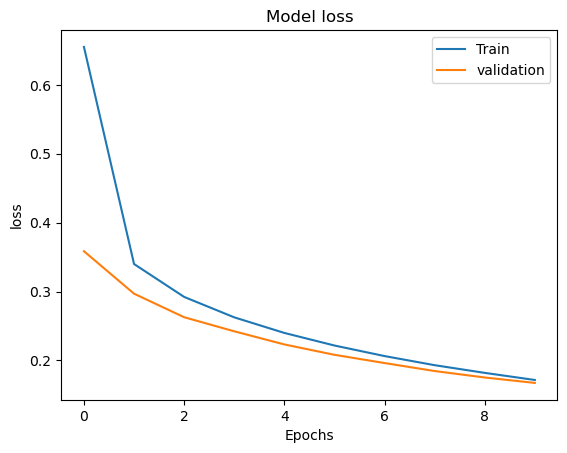

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Train','validation'], loc = 'upper right')
plt.show